In [1]:
import pandas as pd
from pandas_datareader import data as pdr
import numpy as np
import datetime as date
import matplotlib.pyplot as plt

In [2]:
startdate = date.datetime(2019, 3, 20)
enddate = date.datetime(2020, 3, 20)
tag = 'BBVA'
data = pdr.get_data_yahoo(tag, start = startdate, end = enddate)

In [3]:
data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-03-20,6.21,6.13,6.17,6.15,3099000.0,5.516053
2019-03-21,6.13,6.08,6.10,6.09,2793700.0,5.462238
2019-03-22,5.96,5.80,5.94,5.83,6179500.0,5.229039
2019-03-25,5.93,5.83,5.90,5.84,4050000.0,5.238008
2019-03-26,5.83,5.73,5.82,5.79,5662500.0,5.193161


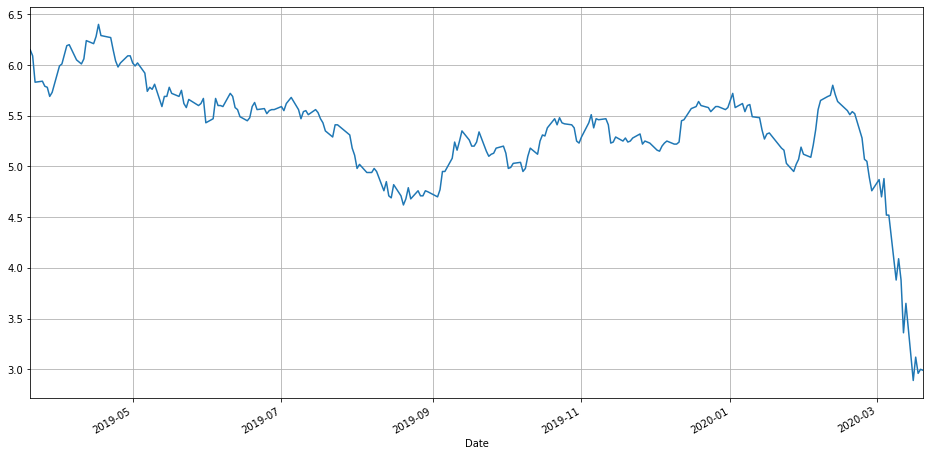

In [4]:
%matplotlib inline 
fig = plt.figure(figsize = (16,8))
data.Close.plot()
plt.grid()

In [5]:
def ROC(df, n):
    M = df['Close'].diff(n - 1)
    N = df['Close'].shift(n - 1)
    ROC = pd.Series(M/N, name = 'ROC_' + str(n))
    df = df.join(ROC)
    Cr = pd.Series(df['Close'].shift(1), name = 'Cr')
    df = df.join(Cr)
    ROCr = pd.Series(ROC.shift(1), name = 'ROC_' + str(n) + '_r')
    df = df.join(ROCr)
    df['Recomendación'] = '-'
    
    df.loc[((ROC > 0) & (ROCr < 0)), 'Recomendación'] = 'Se recomienda COMPRAR la acción.'
    df.loc[((ROC < 0) & (ROCr > 0)), 'Recomendación'] = 'Se recomienda VENDER la acción.'
    df.loc[((df['Close'] < Cr) & ((ROC > 0) & (ROCr < 0) & (ROC > ROCr))), 'Recomendación'] = 'Se recomienda COMPRAR la acción. (DIV)'
    df.loc[((df['Close'] > Cr) & ((ROC < 0) & (ROCr > 0) & (ROC < ROCr))), 'Recomendación'] = 'Se recomienda VENDER la acción. (DIV)'    
    
    return df

In [6]:
df2 = ROC(data, 10)

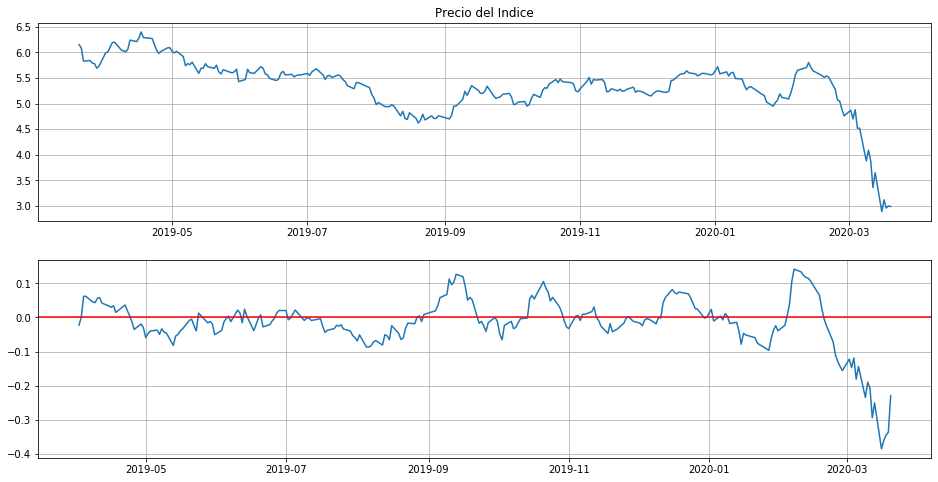

,Close,ROC_10,Recomendación
Date,,,
2019-04-03,6.10,0.001642,Se recomienda COMPRAR la acción.
2019-04-25,5.98,-0.013201,Se recomienda VENDER la acción.
2019-05-24,5.66,0.012522,Se recomienda COMPRAR la acción.
2019-05-28,5.60,-0.015817,Se recomienda VENDER la acción.
2019-06-06,5.60,0.003584,Se recomienda COMPRAR la acción.
2019-06-07,5.59,-0.012367,Se recomienda VENDER la acción.
2019-06-10,5.72,0.021429,Se recomienda COMPRAR la acción.
2019-06-12,5.58,-0.015873,Se recomienda VENDER la acción.
2019-06-13,5.56,0.023941,Se recomienda COMPRAR la acción. (DIV)


In [7]:
fig = plt.figure(figsize = (16,8))
plt.subplot(2, 1, 1)
plt.plot(df2.Close)
plt.title('Precio del Indice')
plt.grid()
plt.subplot(2, 1, 2)
plt.plot(df2.ROC_10)
plt.axhline(y=0, color= 'r')
plt.grid()
plt.show()
df2.loc[df2['Recomendación'] != '-',['Close', 'ROC_10', 'Recomendación']]
#df2[['Close', 'ROC_10', 'Recomendación']]